<a href="https://colab.research.google.com/github/JamesCFabrianes/Google-Collab-Python-/blob/main/B64_House_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing # Manipulasi data agar menyesuaikan dengan format regression

In [ ]:
df = pd.read_csv("/content/house.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.shape # 4600 Baris dengan 18 kolom data

(4600, 18)

# EDA (Exploratory Data Analysis)

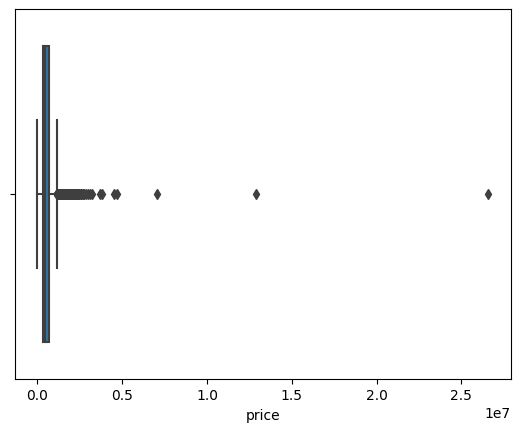

In [ ]:
#Memvisualkan rentang harga pada dataset

ax = sns.boxplot(x = df["price"])

<Axes: xlabel='price'>

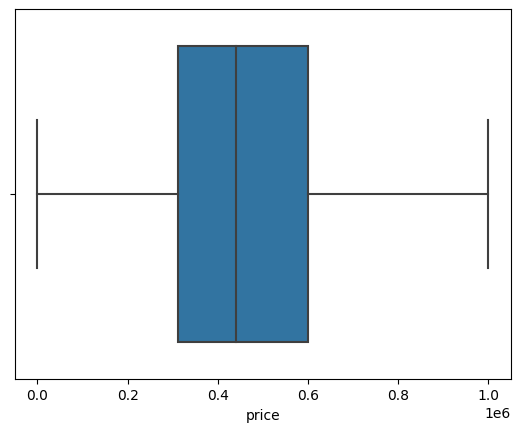

In [ ]:
data_filtered = df[df["price"] <= 1000000]
sns.boxplot(x=data_filtered["price"])

# Data mengandung banyak outlier sehingga tidak representatif, jadi dilakukan filter data

<Axes: xlabel='bedrooms', ylabel='price'>

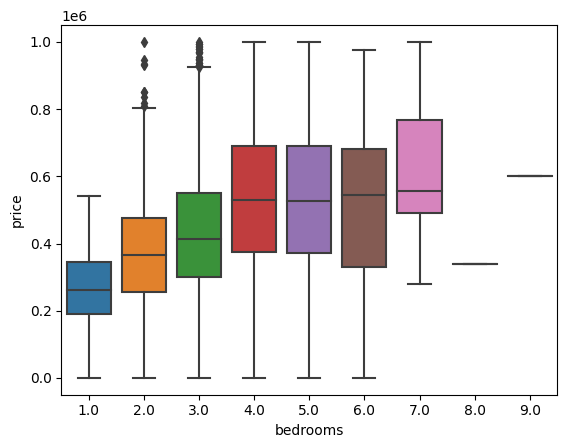

In [ ]:
# Memvisualkan rentang harga berdasarkan jumlah bedrooms

sns.boxplot(x = "bedrooms",
            y = "price",
            data = data_filtered)

# Jumlah bedrooms mempengaruhi harga tetapi dari jumlah kamar 4 - 6 (STABIL)

# Plotly

In [ ]:
import plotly.express as px

fig = px.box(data_filtered, x = "price")
fig.show()

In [ ]:
fig = px.box(data_filtered,
             x = "bedrooms",
             y = "price",
             color = "bedrooms")

fig.show()

In [ ]:
filtered_df = df[(df["price"] > 200000) & (df["price"] < 800000)]
filtered_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
selected_features = ["sqft_living",
                     "sqft_above",
                     "bathrooms",
                     "bedrooms",
                     "sqft_basement",
                     "floors",
                     "view",
                     "price"]

selected_data = filtered_df[selected_features]
selected_data.head()

,sqft_living,sqft_above,bathrooms,bedrooms,sqft_basement,floors,view,price
0,1340,1340,1.50,3.0,0,1.5,0,313000.0
2,1930,1930,2.00,3.0,0,1.0,0,342000.0
3,2000,1000,2.25,3.0,1000,1.0,0,420000.0
4,1940,1140,2.50,4.0,800,1.0,0,550000.0
5,880,880,1.00,2.0,0,1.0,0,490000.0


In [ ]:
X = selected_data.iloc[:, :-1] # Features
y = selected_data["price"]     # Target

In [ ]:
X

,sqft_living,sqft_above,bathrooms,bedrooms,sqft_basement,floors,view
0,1340,1340,1.50,3.0,0,1.5,0
2,1930,1930,2.00,3.0,0,1.0,0
3,2000,1000,2.25,3.0,1000,1.0,0
4,1940,1140,2.50,4.0,800,1.0,0
5,880,880,1.00,2.0,0,1.0,0
...,...,...,...,...,...,...,...
4595,1510,1510,1.75,3.0,0,1.0,0
4596,1460,1460,2.50,3.0,0,2.0,0
4597,3010,3010,2.50,3.0,0,2.0,0
4598,2090,1070,2.00,4.0,1020,1.0,0


In [ ]:
# Feature Scaling
X = selected_data.iloc[:, :-1].values # Ubah ke format array Python
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [ ]:
X_scaled

array([[0.17352415, 0.20905172, 0.15      , ..., 0.        , 0.2       ,
        0.        ],
       [0.27906977, 0.3362069 , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.29159213, 0.13577586, 0.3       , ..., 0.47393365, 0.        ,
        0.        ],
       ...,
       [0.47227191, 0.56896552, 0.35      , ..., 0.        , 0.4       ,
        0.        ],
       [0.30769231, 0.15086207, 0.25      , ..., 0.48341232, 0.        ,
        0.        ],
       [0.20035778, 0.24137931, 0.35      , ..., 0.        , 0.4       ,
        0.        ]])

In [ ]:
selected_features[:-1]

['sqft_living',
 'sqft_above',
 'bathrooms',
 'bedrooms',
 'sqft_basement',
 'floors',
 'view']

In [ ]:
normalized_data = pd.DataFrame(X_scaled,
                               columns = selected_features[:-1])

In [ ]:
normalized_data

,sqft_living,sqft_above,bathrooms,bedrooms,sqft_basement,floors,view
0,0.173524,0.209052,0.15,0.250,0.000000,0.2,0.0
1,0.279070,0.336207,0.25,0.250,0.000000,0.0,0.0
2,0.291592,0.135776,0.30,0.250,0.473934,0.0,0.0
3,0.280859,0.165948,0.35,0.375,0.379147,0.0,0.0
4,0.091234,0.109914,0.05,0.125,0.000000,0.0,0.0
...,...,...,...,...,...,...,...
3682,0.203936,0.245690,0.20,0.250,0.000000,0.0,0.0
3683,0.194991,0.234914,0.35,0.250,0.000000,0.4,0.0
3684,0.472272,0.568966,0.35,0.250,0.000000,0.4,0.0
3685,0.307692,0.150862,0.25,0.375,0.483412,0.0,0.0


In [ ]:
# Features
X = normalized_data.values # dataframe ke array python

# Target
y = selected_data["price"]

In [ ]:
# Split Data Training and Testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 2023)

In [ ]:
# Scikit Learn --> Module Python untuk Machine Learning

# Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
linearregression = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Membuat prediksi dari model linear regression
lin_reg_pred = lin_reg.predict(X_test)

In [ ]:
from sklearn.svm import SVR #Support Vector Regressor

svm_reg = SVR()
svm_reg.fit(X_train, y_train)

SVR()

In [ ]:
svm_reg_pred = svm_reg.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

dt_reg_pred = dt_reg.predict(X_test)

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

rf_reg_pred = rf_reg.predict(X_test)

In [ ]:
prediction_results = pd.DataFrame({
    "Actual" : y_test,
    "Linear Reg" : lin_reg_pred,
    "Decision Tree": dt_reg_pred,
    "Random Forest": rf_reg_pred,
    "SVM": svm_reg_pred
})

In [ ]:
prediction_results

,Actual,Linear Reg,Decision Tree,Random Forest,SVM
748,695000.000000,788776.106198,782000.000000,684128.333333,435150.279309
1253,402000.000000,422300.106198,481015.000000,450611.733333,434963.570781
4145,720000.000000,496596.106198,672500.000000,553774.000000,435141.920670
4569,268971.875000,444292.106198,369990.000000,353716.900000,435076.738317
2071,405000.000000,439498.106198,445000.000000,349144.934444,434945.469070
...,...,...,...,...,...
3306,285000.000000,375084.106198,291266.666667,321120.539610,434790.220953
3742,729032.000000,540180.106198,525000.000000,562278.250000,435115.730652
3254,589950.000000,584884.106198,609900.000000,632090.675000,435226.739249
2805,465000.000000,428596.106198,460000.000000,416987.244444,435020.308453


# Performance Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [ ]:
pred_list = [lin_reg_pred, svm_reg_pred, dt_reg_pred, rf_reg_pred]
penjabaran_list = ["Linear Regression", "SVM", "Decision Tree", "Random Forest"]

In [ ]:
# MSE
for i,prediksi in enumerate(pred_list):
    print(penjabaran_list[i], round(mean_squared_error(y_test, prediksi), 2))

Linear Regression 17138952221.5
SVM 23493868963.4
Decision Tree 29344199154.03
Random Forest 18327676099.95


In [ ]:
# MAE
for i,prediksi in enumerate(pred_list):
    print(penjabaran_list[i], round(mean_absolute_error(y_test, prediksi), 2))

Linear Regression 109672.2
SVM 128796.98
Decision Tree 133029.58
Random Forest 108036.53


In [ ]:
# MAPE
for i,prediksi in enumerate(pred_list):
    print(penjabaran_list[i], round(mean_absolute_percentage_error(y_test, prediksi), 3)*100)

Linear Regression 26.900000000000002
SVM 31.2
Decision Tree 31.8
Random Forest 26.700000000000003


In [ ]:
# RMSE
for i,prediksi in enumerate(pred_list):
    print(penjabaran_list[i], round(mean_squared_error(y_test, prediksi)**0.5, 2))

Linear Regression 130915.82
SVM 153277.1
Decision Tree 171301.49
Random Forest 135379.75
